In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<Axes: xlabel='Age', ylabel='Income($)'>

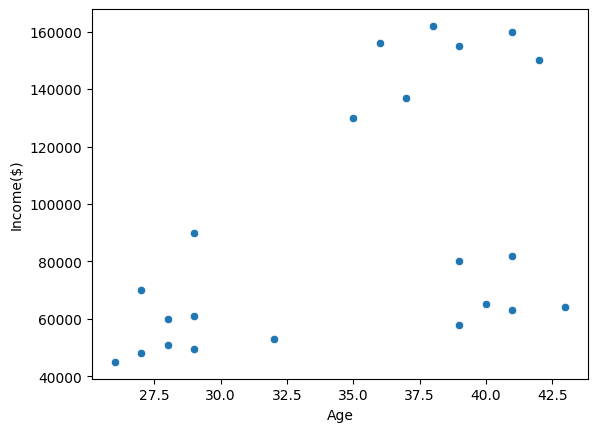

In [22]:
sns.scatterplot(x='Age',y='Income($)',data=df)

In [23]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [24]:
y_pred = model.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [25]:
df['cluster_1'] = y_pred
df.head()

,Name,Age,Income($),cluster_2,cluster_1
0,Rob,27,70000,2,1
1,Michael,29,90000,2,2
2,Mohan,29,61000,2,1
3,Ismail,28,60000,2,1
4,Kory,42,150000,1,0


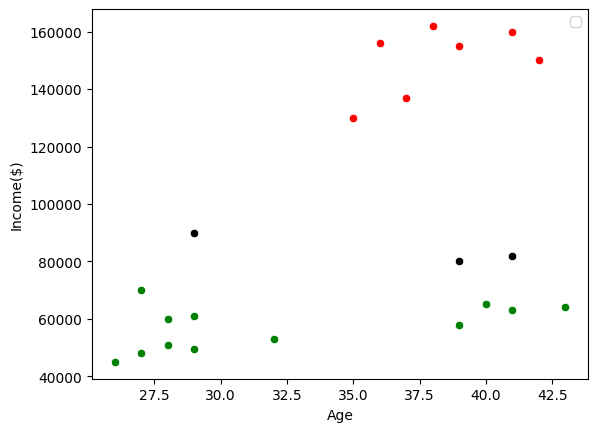

In [26]:
df1 = df[df['cluster_1'] == 0]
df2 = df[df['cluster_1'] == 1]
df3 = df[df['cluster_1'] == 2]

sns.scatterplot(x='Age',y='Income($)',data=df1, color = 'red')
sns.scatterplot(x='Age',y='Income($)',data=df2, color = 'green')
sns.scatterplot(x='Age',y='Income($)',data=df3, color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [27]:
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df.head()

,Name,Age,Income($),cluster_2,cluster_1
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0


In [28]:
y_pred_2 = model.fit_predict(df[['Age', 'Income($)']])
y_pred_2

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [30]:
df['cluster_2'] = y_pred_2
df.head()

,Name,Age,Income($),cluster_2,cluster_1
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,2
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


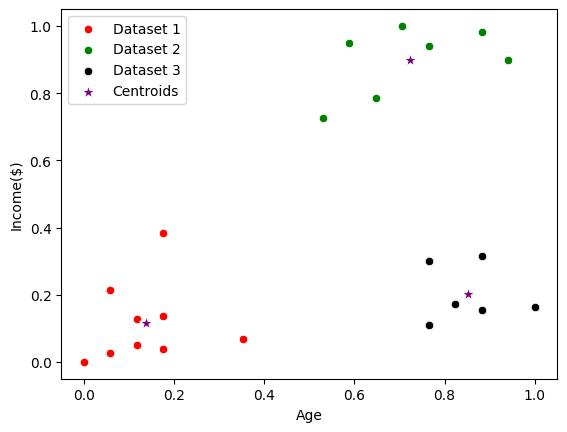

In [31]:
df_1 = df[df['cluster_2'] == 0]
df_2 = df[df['cluster_2'] == 1]
df_3 = df[df['cluster_2'] == 2]


sns.scatterplot(x='Age', y='Income($)', data=df_1, color='red', label='Dataset 1')
sns.scatterplot(x='Age', y='Income($)', data=df_2, color='green', label='Dataset 2')
sns.scatterplot(x='Age', y='Income($)', data=df_3, color='black', label='Dataset 3')
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1],
                color='purple', marker='*', s=100, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# For large dataset you hae to iterate through multiple time based on the number of features the dataset have

In [32]:
df.head()

,Name,Age,Income($),cluster_2,cluster_1
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,2
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [34]:
k_rng = range(1, 11)
sse =[]

for m in k_rng:
  model = KMeans(n_clusters=m)
  model.fit(df[['Age', 'Income($)']])
  sse.append(model.inertia_)

sse

[5.434011511988179,
 2.4571335359046356,
 0.4750783498553097,
 0.38815291664787444,
 0.345195219144095,
 0.2347239600356005,
 0.19976267209302584,
 0.1425871182547609,
 0.10740235405674733,
 0.08510915216361348]

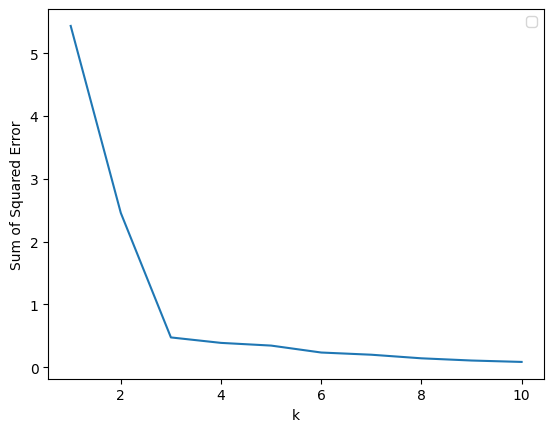

In [36]:
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.legend()